# The Random Behvaiour of Assets Exercises
### The log-normal random walk

$$
d S=\mu S d t+\sigma S d X
$$

In class, we have looked at the Stochastic Differential Equation as a popular model for stock price $S$.

On the dataset of prices from the Lecture Excel file - or any equity index of your own choice, we test the robustness of the assumption that

$$
R_{i}=\left[\mu \delta t+\sigma \sqrt{\delta t} \phi_{i}\right]
$$

if the drift is a negligible, very small and non-robust quantity, $\mu \delta t \approx 0$,

$$
R_{i}=\sigma \sqrt{\delta t} \phi_{i}
$$

$R_{i}$ represents the returns over timestep $\delta t$, the $\phi_{i} \sim N(0,1)$ is Standard Normal variable. The tasks below give sufficient detail to be preformed on your own - the solutions give more information but no separate computation provided.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import yfinance as yf

### Exercise 1
Scaling of $\sigma$ with time, to the size of $\delta t$ : compute column(s) of returns (1D, 2D or 5D but no longer). For example, $5 \mathrm{D}$ will be $R_{i}=\frac{S_{t+5}-S_{t}}{S_{t}}$. For each, compute the std dev of the whole column.

Adjust $\sigma_{2 D}$ by $1 / \sqrt{2}$, and $\sigma_{5 D}$ by $1 / \sqrt{5}$ - are these comparable to $\sigma_{1 D}$ ?

Date
2014-01-02 00:00:00-05:00    17.364965
2014-01-03 00:00:00-05:00    16.983532
2014-01-06 00:00:00-05:00    17.076138
2014-01-07 00:00:00-05:00    16.954012
2014-01-08 00:00:00-05:00    17.061380
Name: Close, dtype: float64


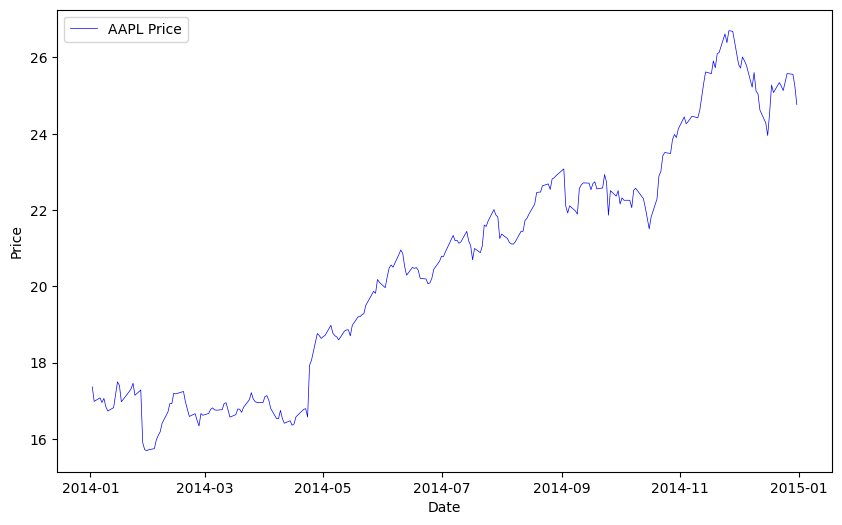

In [81]:
# First we need to get stock data, let's get the data for Apple
ticker = 'AAPL'
ticker_data = yf.Ticker(ticker)

# Get historical close prices
df = ticker_data.history(period='1d', start='2014-1-1', end='2015-1-1')['Close']
print(df.head())

# Define a function to plot the data
def plot_data(df, ticker):
    plt.figure(figsize=(10, 6))
    plt.plot(df, color='blue', linewidth=0.5, label=f'{ticker} Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()

# Plot the data
plot_data(df, ticker)

In [82]:
# Find the 1D, 2D and 5D returns
def compute_Return(df, days):
    df = (df - df.shift(days)) / df.shift(days)
    df.rename(f'{days}D_Return', inplace=True)
    return df

one_day_return = compute_Return(df, 1)
two_day_return = compute_Return(df, 2)
five_day_return = compute_Return(df, 5)

# Add the returns to the dataframe
df = pd.concat([df, one_day_return, two_day_return, five_day_return], axis=1)
df.head(10)

,Close,1D_Return,2D_Return,5D_Return
Date,,,,
2014-01-02 00:00:00-05:00,17.364965,NaN,NaN,NaN
2014-01-03 00:00:00-05:00,16.983532,-0.021966,NaN,NaN
2014-01-06 00:00:00-05:00,17.076138,0.005453,-0.016633,NaN
2014-01-07 00:00:00-05:00,16.954012,-0.007152,-0.001738,NaN
2014-01-08 00:00:00-05:00,17.061380,0.006333,-0.000864,NaN
2014-01-09 00:00:00-05:00,16.843508,-0.012770,-0.006518,-0.030029
2014-01-10 00:00:00-05:00,16.731117,-0.006673,-0.019357,-0.014862
2014-01-13 00:00:00-05:00,16.818710,0.005235,-0.001472,-0.015075
2014-01-14 00:00:00-05:00,17.153366,0.019898,0.025237,0.011759


In [83]:
# Find the standard deviation of the returns
one_day_std = df['1D_Return'].std()
two_day_std = df['2D_Return'].std() / np.sqrt(2)
five_day_std = df['5D_Return'].std() / np.sqrt(5)

# Find the mean of the returns
one_day_mean = df['1D_Return'].mean()
two_day_mean = df['2D_Return'].mean()
five_day_mean = df['5D_Return'].mean()

# Print the standard deviation and mean of the returns
print(f'1D Return Mean: {one_day_mean}, 1D Return Std: {one_day_std}')
print(f'2D Return Mean: {two_day_mean}, 2D Return Std: {two_day_std}')
print(f'5D Return Mean: {five_day_mean}, 5D Return Std: {five_day_std}')

1D Return Mean: 0.001508299090984589, 1D Return Std: 0.013634792137276256
2D Return Mean: 0.0031995211972847787, 2D Return Std: 0.013756781657461596
5D Return Mean: 0.00846606996236636, 5D Return Std: 0.014585513959168335


Answer: We adjust the $\sigma$ by the square root of the time step and we see that the $\sigma$'s are comparable.

### Exercise 2
Re-shuffle the dataset into two non-chronological halves (even / odd observations) and compute $\mu, \sigma$ separately for each half (1D returns only). Compare.

In [84]:
# Shuffle the 1D returns
one_day_return_shuffled = one_day_return.sample(frac=1).reset_index(drop=True).rename('1D_Return_Shuffled')
one_day_return_shuffled.head(10)

# Split the 1D returns into two halves
one_day_return_half_1 = one_day_return_shuffled[:len(one_day_return_shuffled) // 2]
one_day_return_half_2 = one_day_return_shuffled[len(one_day_return_shuffled) // 2:]

# Find the standard deviation of the two halves
one_day_std_half_1 = one_day_return_half_1.std()
one_day_std_half_2 = one_day_return_half_2.std()

# Print the standard deviation of the two halves
print(f'1D Return Half 1 Std: {one_day_std_half_1}')
print(f'1D Return Half 2 Std: {one_day_std_half_2}')


1D Return Half 1 Std: 0.013742613796019673
1D Return Half 2 Std: 0.013563610002325328


Answer: Looks like the standard deviation is comparable

### Exercise 3
Construct Quantile-Quantile plots for $1 \mathrm{D}$ and $5 \mathrm{D}$ returns. The Q-Q plot assumes Normal distribution on horizontal axis - the better the fit between of the empirical returns to Normal distribution, the more observations will be on the diagonal line.

In [85]:
# Recreate the 1D and 5D returns as log returns
# Save each return in a new dataframe
df_1D = df[['Close']].copy()
df_1D['Return'] = compute_Return(np.log(df['Close']), 1)

df_5D = df[['Close']].copy()
df_5D['Return'] = compute_Return(np.log(df['Close']), 5)

dataframes = [df_1D, df_5D]
df_1D.head()

,Close,Return
Date,,
2014-01-02 00:00:00-05:00,17.364965,NaN
2014-01-03 00:00:00-05:00,16.983532,-0.007781
2014-01-06 00:00:00-05:00,17.076138,0.001920
2014-01-07 00:00:00-05:00,16.954012,-0.002529
2014-01-08 00:00:00-05:00,17.061380,0.002230


In [86]:
# Define a function to transform the data to be plotted as a QQ plot
def transform_qq(df):

    # Rename the Close column to Historic
    df = df.rename(columns={'Close': 'Historic'})

    # Find the number of days of return from number of NaNs in Return column
    days = df['Return'].isna().sum()
    print(f'Days: {days}')

    # Find mean and standard deviation of the returns
    mean = df['Return'].mean()
    std = df['Return'].std() / np.sqrt(days)

    # Add columns for scaled 1D and 5D returns (z-scores)
    df['zscore'] = (df['Return'] - mean) / std

    # Sort the dataframe by the zscore column in ascending order
    df.sort_values(by='zscore', inplace=True)


    # Drop the date index and reset it, then drop the Date column
    df.reset_index(inplace=True)
    df.drop('Date', axis=1, inplace=True)

    # Add an i/N column where i is the index and N is the number of rows 
    df['i'] = df.index + 1
    df['i/N'] = df['i'] / len(df)
    
    # Find the standardised percentile as the inverse of the Normal CDF(i/N)
    df['Standard Normal'] = -ss.norm.pdf(df['i/N'])

    return df.copy()

In [87]:
dataframes = map(transform_qq, dataframes)
df_1D, df_5D = dataframes
df_1D.head()

Days: 1
Days: 5


,Historic,Return,zscore,i,i/N,Standard Normal
0,15.901061,-0.029232,-6.469059,1,0.003968,-0.398939
1,22.104578,-0.013738,-3.095454,2,0.007937,-0.398930
2,21.865524,-0.012446,-2.814042,3,0.011905,-0.398914
3,25.819719,-0.010047,-2.291593,4,0.015873,-0.398892
4,16.973791,-0.008685,-1.995001,5,0.019841,-0.398864


In [88]:
df_5D.head()

,Historic,Return,zscore,i,i/N,Standard Normal
0,15.690089,-0.037387,-8.160421,1,0.003968,-0.398939
1,15.720542,-0.033860,-7.442093,2,0.007937,-0.398930
2,15.745027,-0.032693,-7.204240,3,0.011905,-0.398914
3,15.715835,-0.030595,-6.777015,4,0.015873,-0.398892
4,15.901061,-0.028345,-6.318675,5,0.019841,-0.398864


In [100]:
# Plot the scaled returns (z-scores) against the Standard Normal percentiles
def plot_qq(df, days):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Standard Normal'], df['zscore'], facecolor='none', edgecolor='black', label='1D Returns')

    plt.title(f'QQ Plot for {days}D Standardised Returns (Z-scores)\n', fontsize=10, fontweight='bold')
    plt.xlabel('\nStandard Normal')
    plt.ylabel('Historic Standardised Returns (Z-scores)\n')
    plt.show()

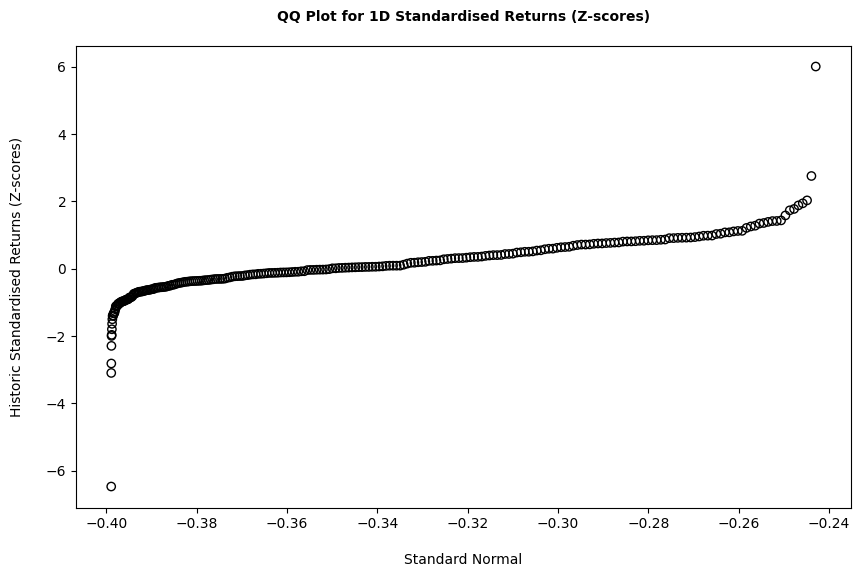

In [101]:
plot_qq(df_1D, 1)

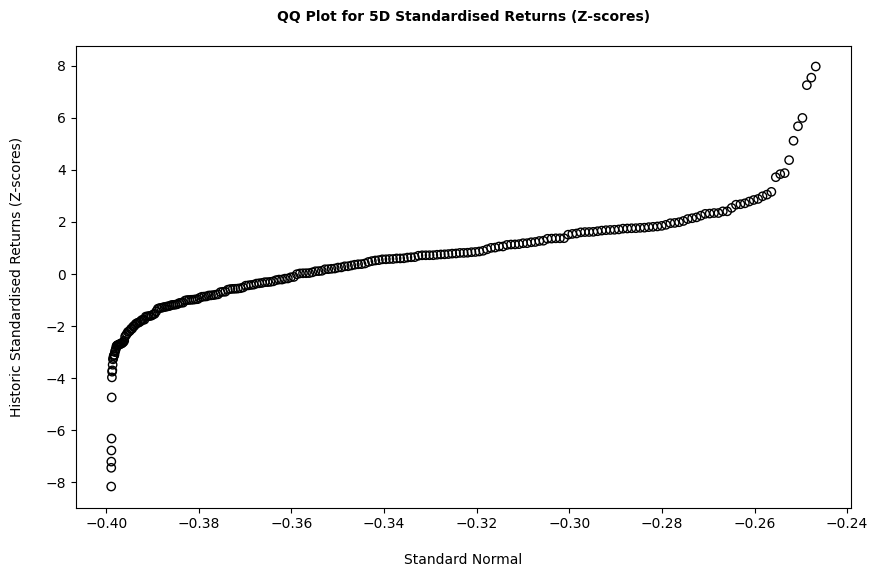

In [102]:
plot_qq(df_5D, 5)

### Exercise 4
Construct a histogram over historical returns scaled to z-scores and compare to Normal distribution density.
$$
R_{i}=\frac{\delta S}{S}=\frac{S_{t+1}-S_{t}}{S_{t}}=\frac{S_{t+1}}{S_{t}}-1
$$